In [17]:
import librosa
import os
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
scale_file = "audio/scale.wav"
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"


In [8]:
scale, sr = librosa.load(scale_file)
debussy, _ = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)
print(scale.shape)

(174943,)


In [26]:
frame_size=2048
hop_size=256
S_scale=librosa.stft(scale,n_fft=frame_size,hop_length=hop_size)
print(S_scale.shape, S_scale[0][0], type(S_scale[0][0]), len(scale))
# 计算 freq (# frequency bins)方面的=FRAME_SIZE/2 + 1 = 2048/2 + 1 = 1025
# 计算有多少个块(# frames)需要计算：(174943-2048)/512 + 1 = 338.68
print((174943-2048)/256.0 + 1) # 问题：什么是338.68，不是342?
# 342是如何计算出来的？
#342=338+4; 2048%512=4,四是这里来的

#(1025, 342) (4.9290094+0j) <class 'numpy.complex64'> 174943
#338.685546875 ->342 because 

(1025, 684) (4.9290094+0j) <class 'numpy.complex64'> 174943
676.37109375


In [18]:
Y_scale=np.abs(S_scale)**2
print(Y_scale.shape,type(Y_scale[0][0]))

(1025, 342) <class 'numpy.float32'>


In [19]:
def plot_spectrogram(Y,sr,hop_size,y_axis='linear'):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y,sr=sr,hop_length=hop_size,
                             x_axis='time',y_axis=y_axis)
    plt.colorbar(format='%+2.f')

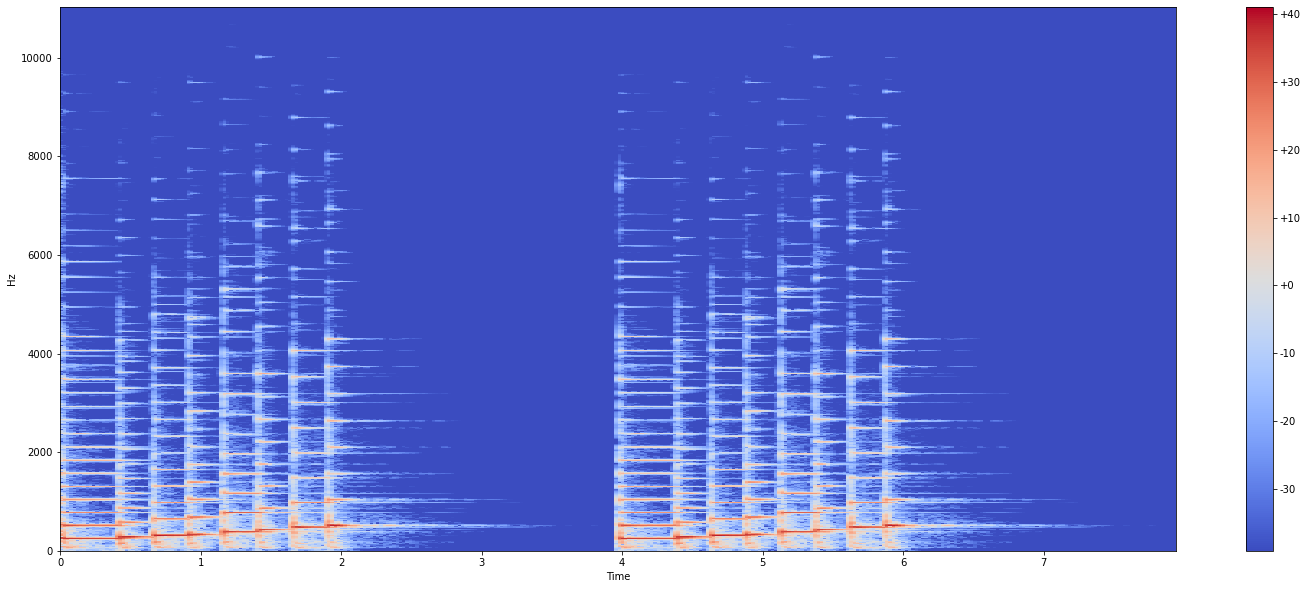

In [20]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, hop_size)

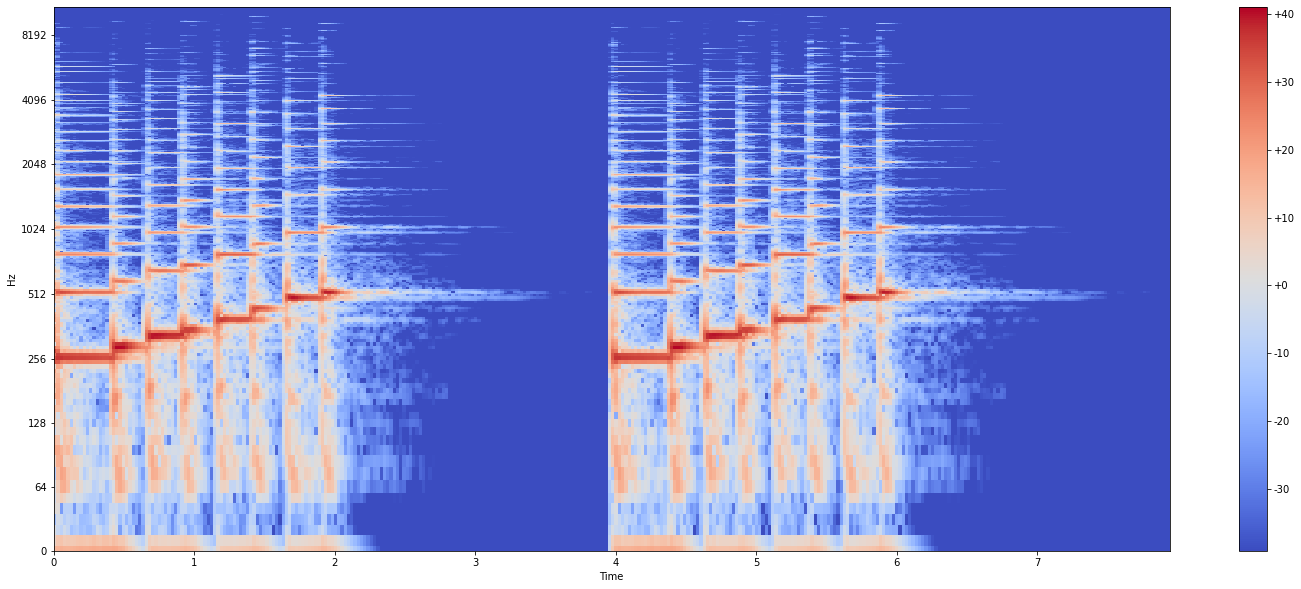

In [22]:
plot_spectrogram(Y_log_scale,sr,hop_size,y_axis='log')

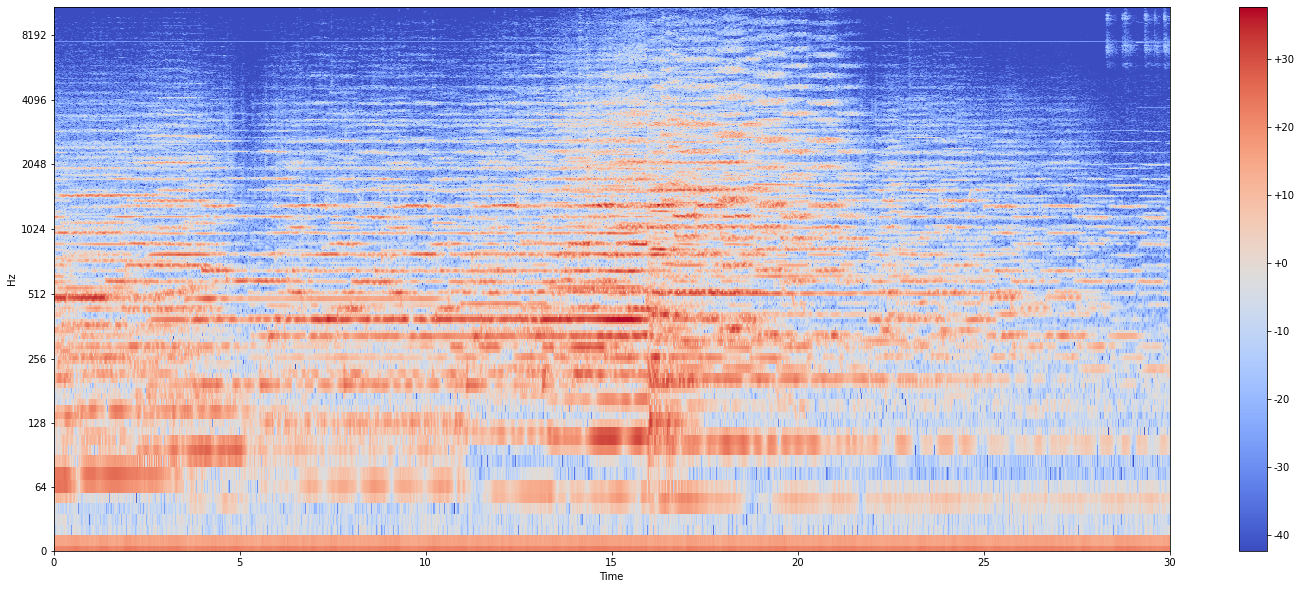

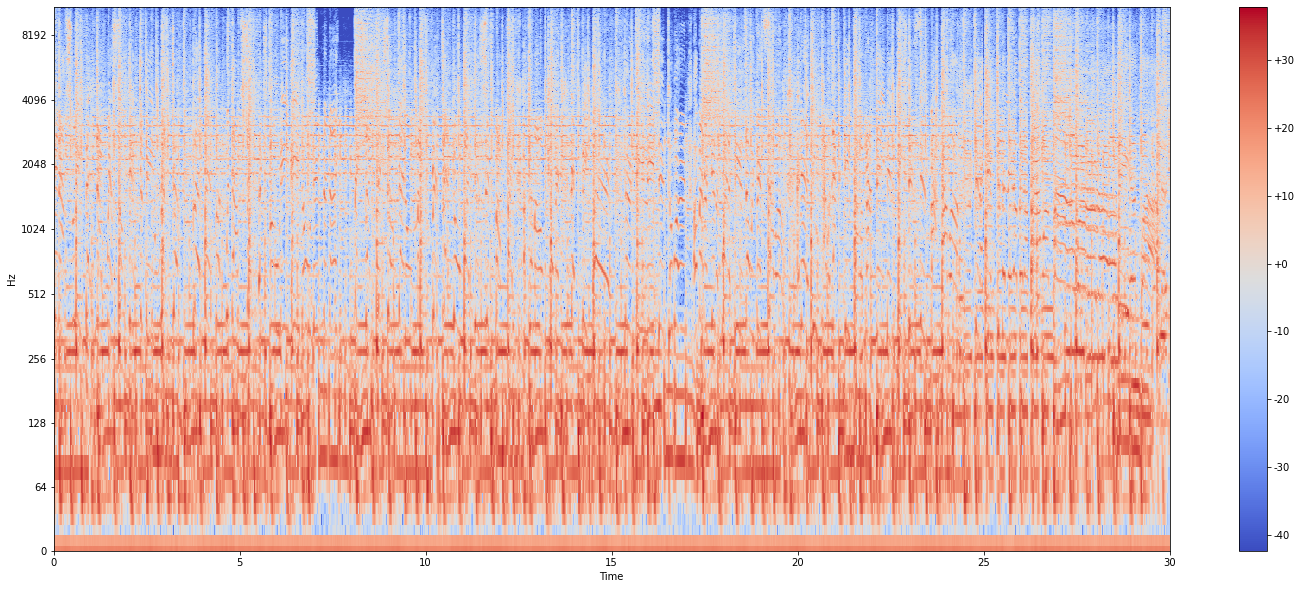

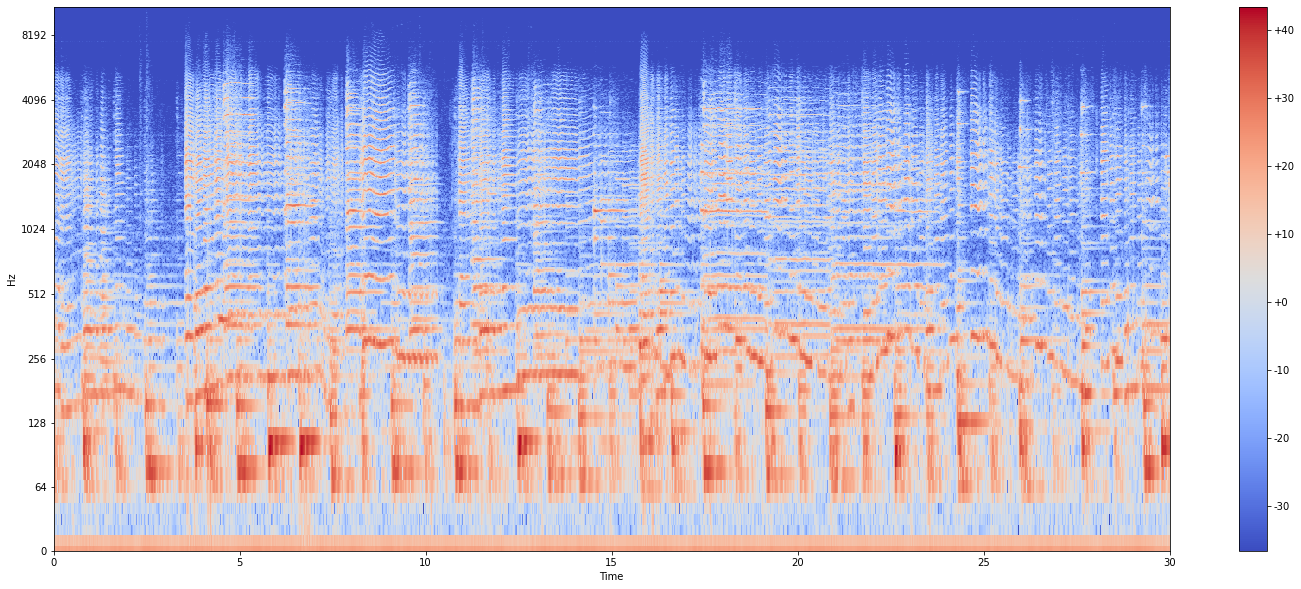

In [25]:
FRAME_SIZE,HOP_SIZE=2048,512
S_debussy = librosa.stft(debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_redhot = librosa.stft(redhot, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_duke = librosa.stft(duke, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)


Y_debussy = librosa.power_to_db(np.abs(S_debussy) ** 2)
Y_redhot = librosa.power_to_db(np.abs(S_redhot) ** 2)
Y_duke = librosa.power_to_db(np.abs(S_duke) ** 2)

plot_spectrogram(Y_debussy, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_redhot, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_duke, sr, HOP_SIZE, y_axis="log")